<a href="https://colab.research.google.com/github/M-Amrollahi/Personal-Notes/blob/master/ML-notes/sklearn_techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## How to use FunctionTransformer to set custom transformer

In [ ]:
import numpy as np
from sklearn.preprocessing import FunctionTransformer

# Generate some random data
X = np.random.normal(0, 5, size=(100,))

transformer = FunctionTransformer(func=np.exp,
                                  inverse_func=np.log,
                                  )

x_log = transformer.transform(X)
X_new = transformer.inverse_transform(x_log)

np.allclose(X, X_new)

True

## How to set parameters for FunctionTransformer

In [ ]:
from sklearn.preprocessing import FunctionTransformer
import numpy as np

# Define a custom function to normalize data
def normalize(X):
    return (X - np.mean(X, axis=0)) / np.std(X, axis=0), np.mean(X, axis=0),np.std(X, axis=0)

def inverse_normalize(X_norm, mu, sigma):
    X = X_norm * sigma + mu
    return X

# Create a FunctionTransformer object to apply normalization
transformer = FunctionTransformer(normalize, inverse_func=inverse_normalize)

# Generate some random data
X = np.random.normal(0, 1, size=(100, 3))

# Apply the transformer to the input data
X_transformed,x_mean,x_std = transformer.transform(X)
transformer.inv_kw_args = {"mu": x_mean, "sigma": x_std}

# Apply the inverse transformation to the transformed data
X_inverse = transformer.inverse_transform(X_transformed)

# Check if the original data is equal to the inverse-transformed data
np.allclose(X, X_inverse)

True

In [ ]:
from sklearn.preprocessing import PowerTransformer
import numpy as np

# Generate some random data with a non-Gaussian distribution
X = np.random.gamma(1, size=(100, 3))

# Create a PowerTransformer object
transformer = PowerTransformer()

# Apply the transformer to the input data
X_transformed = transformer.fit_transform(X)

# Print the mean and standard deviation of the transformed data
print("Mean:", np.mean(X_transformed, axis=0))
print("Standard deviation:", np.std(X_transformed, axis=0))

Mean: [-2.49800181e-17  1.20681243e-15 -3.04756220e-16]
Standard deviation: [1. 1. 1.]


## Voting Classifier , StackingClassifier

In [ ]:
from sklearn.ensemble import VotingClassifier, StackingClassifier
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000)

ensemble = VotingClassifier(
    estimators=[
        ("xgb", xgb.XGBClassifier(eval_metric="auc")),
        ("lgbm", lgbm.LGBMClassifier()),
        ("cb", cb.CatBoostClassifier(verbose=False)),
    ],
    voting="soft",
    # n_jobs=-1,
)

_ = ensemble.fit(X, y)

#######
ensemble = StackingClassifier(
    estimators=[
        ("xgb", xgb.XGBClassifier(eval_metric="auc")),
        ("lgbm", lgbm.LGBMClassifier()),
        ("cb", cb.CatBoostClassifier(verbose=False)),
    ],
    final_estimator=LogisticRegression(),
    cv=5,
    passthrough=False
    # n_jobs=-1,
)

_ = ensemble.fit(X, y)

NameError: ignored

## PCA, tSNE, UMAP for dim resuction

In [ ]:
#######

## Detecting outliers
As for LocalOutlierFactor, it is a neighbors-based algorithm designed to work fast with large datasets.

In [ ]:
import umap  # pip install umap
from sklearn.neighbors import LocalOutlierFactor

X, y = make_classification(n_samples=5000, n_classes=2, n_features=10)
X_reduced = umap.UMAP(n_components=2).fit_transform(X, y)

lof = LocalOutlierFactor()
labels = lof.fit_predict(X_reduced, y)

## Using joblib module to save the model in sklearn

In [ ]:
from sklearn import svm
from sklearn import datasets
from joblib import dump

# Load a sample dataset
iris = datasets.load_iris()
X, y = iris.data, iris.target

# Train a model
model = svm.SVC()
model.fit(X, y)

# Save the model to a file
dump(model, 'model.joblib')


In [1]:
from sklearn.ensemble import StackingClassifier
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

X, y = load_iris(return_X_y=True)
estimators = [('rf', RandomForestClassifier(n_estimators=10, random_state=42))
             ,('svr', make_pipeline(StandardScaler(),LinearSVC(random_state=42)))]

clf = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression()
)


X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, random_state=42
)
clf.fit(X_train, y_train).score(X_test, y_test)

0.9473684210526315

In [2]:
clf

StackingClassifier(estimators=[('rf',
                                RandomForestClassifier(n_estimators=10,
                                                       random_state=42)),
                               ('svr',
                                Pipeline(steps=[('standardscaler',
                                                 StandardScaler()),
                                                ('linearsvc',
                                                 LinearSVC(random_state=42))]))],
                   final_estimator=LogisticRegression())

## How to create a simple Gaussian estiomator with scipy.stats.multivariate_normal out of some normally distributed features.

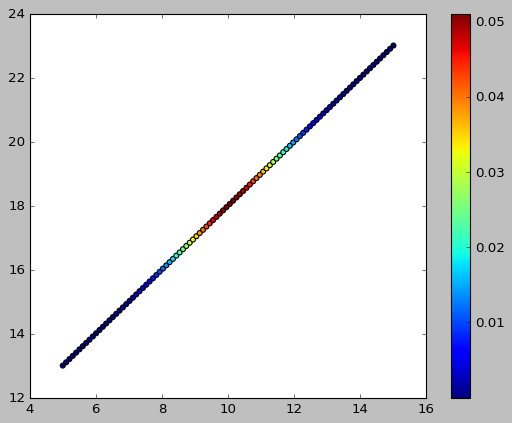

In [59]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# generate 100 random features from normal distribution and 5 "anomalies" from uniform distribution
x1 = np.random.normal(10, 5, size=100)
x2 = np.random.normal(18, 2, size=100)

# calculate actual means and standard deviations from our feature sets
means = np.mean([x1, x2], axis=1)
stdevs = np.std([x1, x2], axis=1)

# create a multivariate distribution given our means and standard deviations
dist = stats.multivariate_normal(means, stdevs)


t1 = np.linspace(5,15,100)
t2 = np.linspace(13,23,100)
t = np.vstack([t1,t2]).T

y = dist.pdf(t)


plt.style.use('classic')
plt.scatter(t1,t2,c=y)
plt.colorbar()

## Shapiro test for normal distribution

Not normal


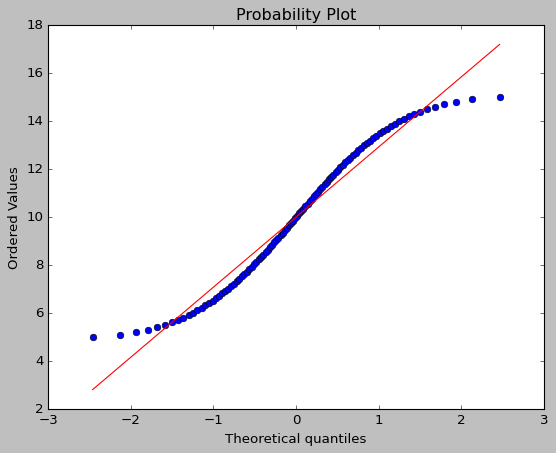

In [63]:
from scipy.stats import shapiro

stat, p = shapiro(t1)
if p> .05:
    print("Normal")
else:
    print("Not normal")

import scipy.stats as stats
stats.probplot(t1, dist="norm", plot=plt)
plt.show()